A continuación se muestra una matriz de expresión genética:

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal.BC0043N,9167.03,7380.27,8341.82,7944.99,8367.28,7884.22,6209.89,6009.60,9017.07,⋯,13.9187,30.9902,26.8305,30.6226,13.6677,23.7455,29.1401,23.8904,64.3171,25.5825
Cancer.BC0043T,10635.90,11010.80,9859.02,10493.60,10805.70,8507.10,9060.41,9426.21,8674.11,⋯,17.2673,56.3875,16.9442,14.5954,15.2555,19.2764,16.4308,26.5672,53.7115,28.7201
Normal.BC0051N,8015.29,6112.62,8287.92,7360.60,7060.93,8003.40,7140.51,6029.11,7026.17,⋯,26.6429,29.1446,23.8505,32.2064,15.9346,27.4183,21.6383,21.3962,27.9609,45.1721
Cancer.BC0051T,9081.20,8925.35,8276.54,9021.02,8622.68,8925.17,7862.39,6847.31,9651.01,⋯,37.5716,30.0083,20.7826,22.1020,27.5567,26.4899,26.3171,16.6457,41.5037,25.8667
Normal.BC0057N,9006.52,8338.44,7069.53,7909.77,7348.80,7966.06,7120.25,7903.76,7387.18,⋯,36.4167,29.9436,45.3716,31.1614,31.3397,32.0059,29.1746,21.2647,34.7236,35.4706
Cancer.BC0057T,8307.87,7295.69,7048.75,7111.87,6372.62,8056.31,6406.97,6256.54,7098.11,⋯,21.3444,54.1291,37.4840,22.2405,50.9866,26.8458,33.2448,18.3316,24.6310,24.8679


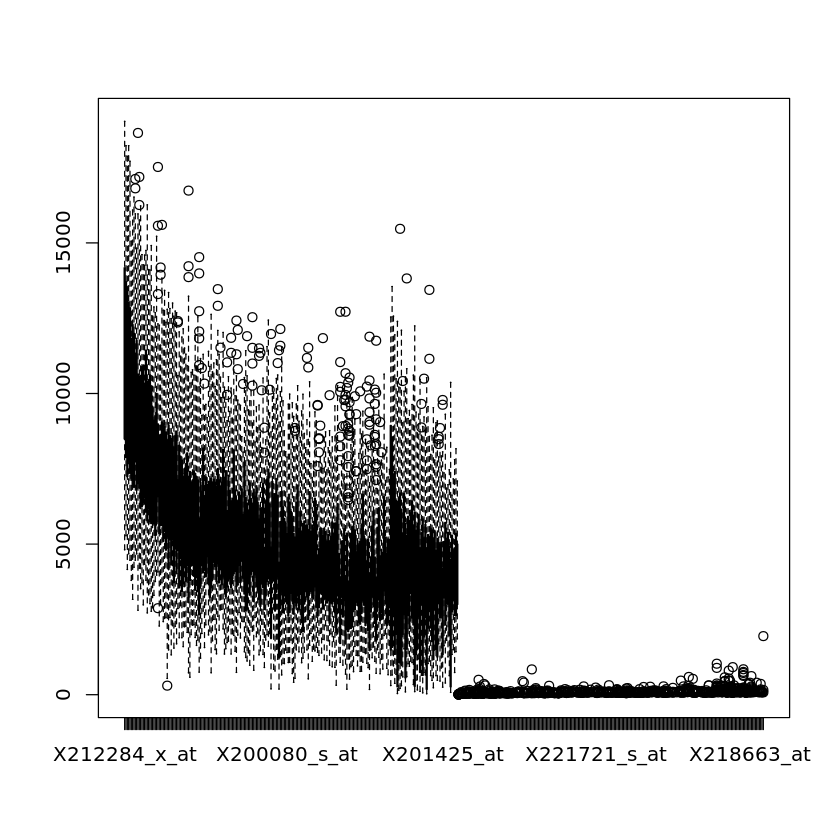

In [1]:
genexp <- read.csv("practica/GEMatrixFiltered.csv")
head(genexp)
boxplot(genexp[, 2:ncol(genexp)])

In [2]:
ncol(genexp)
nrow(genexp)

[1] 482

[1] 86

### Limpieza de datos

* Normalizar
* ¿Existen outliers? Tratamiento de Outliers

In [3]:
library(pracma)

#Factorización de la columna X
genexp$diagnosis[grepl("Normal", genexp$X)] = "Normal"
genexp$diagnosis[grepl("Cancer", genexp$X)] = "Cancer"
genexp$X <- as.factor(genexp$diagnosis)
genexp$diagnosis <- NULL
diagnosis <- genexp$X

genexp_out <- genexp[, 2:ncol(genexp)]

#Tratamiento de Outliers (valores extremos)
for (i in 1:ncol(genexp_out)) {
    x <- genexp_out[, i]
    qnt  <- quantile(x, probs = c(.25, .75), na.rm = T)
    caps <- quantile(x, probs = c(.1, .90), na.rm = T)
    H <- 3 * IQR(x, na.rm = T)
    x[x < (qnt[1] - H)] <- caps[1]
    x[x > (qnt[2] + H)] <- caps[2]
    genexp_out[, i] <- x
}

#Normalización
mnCols <- repmat(colMeans(genexp_out), n = nrow(genexp_out), m = 1)
sdCols <- repmat(sapply(genexp_out, sd, na.rm = T), n = nrow(genexp_out), m = 1)
genexp_norm <- data.frame(diagnosis, (genexp_out - mnCols) / sdCols)

diagnosis,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal,-0.6068573,-1.02303975,-0.5878681,-0.70458754,-0.4870628,-0.5981818,-1.0468240,-1.11345722,-0.1731209,⋯,-0.9819469,-0.3608567,-0.4267964,-0.3357943,-0.9473334,-0.6923526,-0.4336294,-0.6732049,1.5176937,-0.89224324
Cancer,-0.1727236,0.04000518,-0.1604944,0.08466742,0.2924008,-0.3718649,-0.1419996,-0.04807841,-0.2977776,⋯,-0.8130644,1.2376754,-0.9261639,-1.4005432,-0.8790398,-0.9679607,-1.3629316,-0.5231380,0.9096190,-0.61943400
Normal,-0.9472612,-1.39421666,-0.6030510,-0.88556176,-0.9046498,-0.5548790,-0.7514226,-1.10737355,-0.8967592,⋯,-0.3402178,-0.4770206,-0.5773193,-0.2305764,-0.8498308,-0.4658521,-0.9821600,-0.8130349,-0.5667981,0.81104073
Cancer,-0.6322249,-0.57062937,-0.6062566,-0.37136197,-0.4054218,-0.2199636,-0.5222803,-0.85223967,0.0572991,⋯,0.2109575,-0.4226585,-0.7322822,-0.9018507,-0.3499477,-0.5231062,-0.6400467,-1.0793576,0.2096817,-0.86753251
Normal,-0.6542970,-0.74248078,-0.9462542,-0.71549449,-0.8126294,-0.5684461,-0.7578536,-0.52281389,-0.7655418,⋯,0.1527116,-0.4267307,0.5097343,-0.2999997,-0.1872354,-0.1829361,-0.4311067,-0.8204070,-0.1790570,-0.03248897
Cancer,-0.8607874,-1.04780538,-0.9521076,-0.96258861,-1.1246744,-0.5356547,-0.9842660,-1.03645556,-0.8706110,⋯,-0.6074410,1.0955294,0.1113232,-0.8926497,0.6578058,-0.5011580,-0.1334943,-0.9848426,-0.7577187,-0.95437655


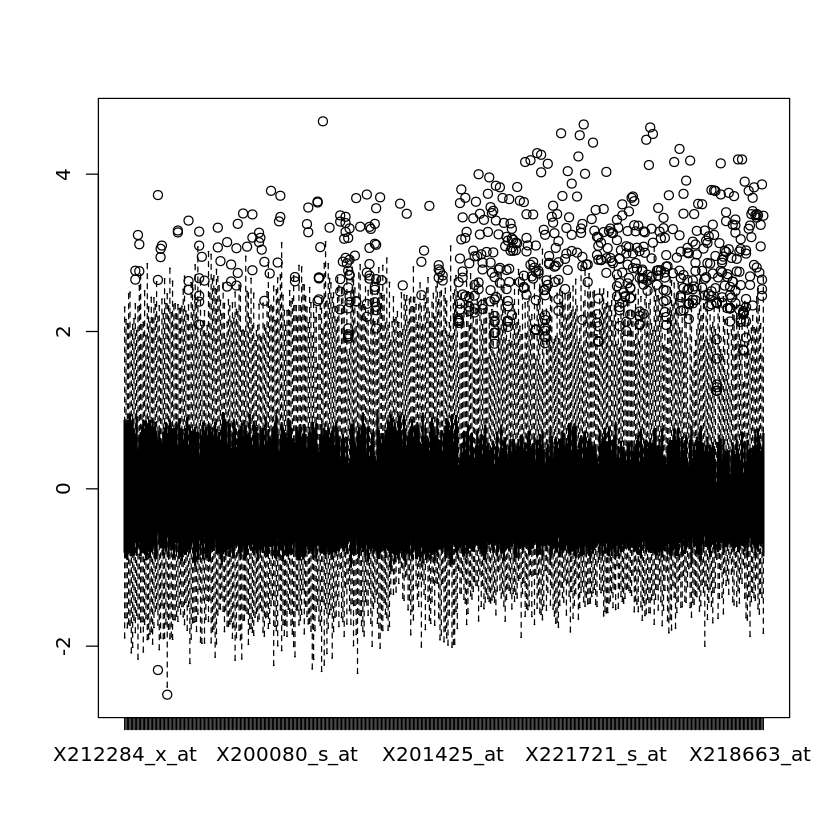

In [4]:
head(genexp_norm)
boxplot(genexp_norm[, 2:ncol(genexp)])

In [5]:
set.seed(1234)
#Conjuntos de training y test
idx <- sample(1:nrow(genexp), round(nrow(genexp) * 0.7))
genexp.train_norm <- genexp_norm[ idx,]
genexp.test_norm  <- genexp_norm[-idx,]

### Parte 1
Realizar un modelo de regresión logistica que sea capaz de, dada la expresión genética de 482 genes realice una predicción de si el tejido es canceroso o no:
* Pintar curva ROC
* Para un umbral de 0 calcular:
 * Precisión
 * F0.5
 * Exactitud
 * Exhaustividad
 * Matriz de confusión
 

In [6]:
#Cálculo de la regresión logística
model_genexp <- glm(data = genexp.train_norm, formula = diagnosis ~ ., family = binomial(link = 'logit'))
y_predict <- predict(model_genexp, genexp.test_norm)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

In [7]:
library(ggplot2)

calctp_fp <- function(y_predict, y_real, th) {
    y_est <- ifelse(y_predict < th, 0, 1)
    idx_normal <- y_real == 1
    idx_cancer <- y_real == 0

    M <- table(y_est, genexp.test_norm$diagnosis)
    if (ncol(M) == 2 && nrow(M) == 2) {
        truePositive <- M[1, 1] / (M[1, 1] + M[2, 1])
        falsePositive <- M[1, 2] / (M[1, 2] + M[2, 2])
        c(tp = truePositive, fp = falsePositive)
    }
    else {
        c(tp = NA, fp = NA)
    }
}

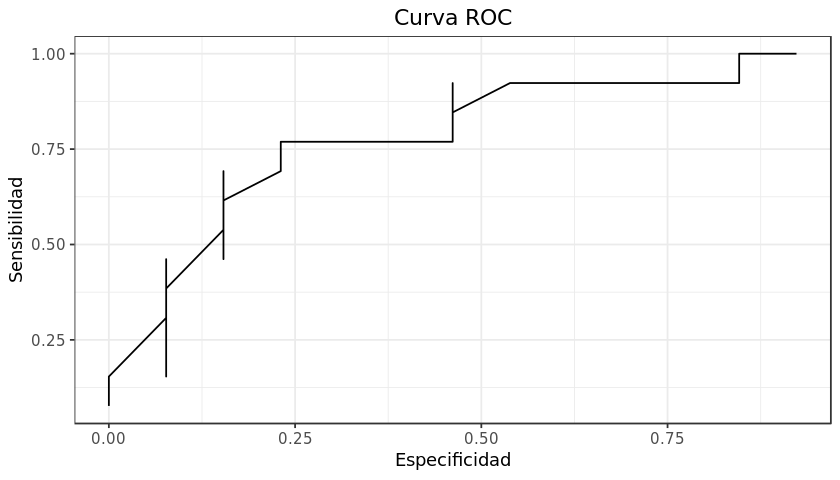

In [8]:
#Cálculo de la curva ROC
dfROC1 <- data.frame(th = unique(y_predict), tp = NA, fp = NA)

for (i in 1:nrow(dfROC1)) {
    v <- calctp_fp(y_predict, genexp.test_norm$diagnosis, dfROC1$th[i])
    dfROC1$tp[i] <- v["tp"]
    dfROC1$fp[i] <- v["fp"]
}

dfROC1 <- dfROC1[order(dfROC1$fp),]

options(repr.plot.height = 4, repr.plot.width = 7)

ggplot(data = na.omit(dfROC1), aes(x = fp, y = tp)) +
    geom_path() +
    labs(title = "Curva ROC", x = "Especificidad", y = "Sensibilidad") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.height = 7, repr.plot.width = 7)

In [9]:
y_est <- factor(ifelse(y_predict < 0, 0, 1), labels = c("Cancer", "Normal"))

#Medidas de calidad
M <- matrix(rep(0, 4), ncol = 2)

idx_normal <- genexp.test_norm$diagnosis == "Normal"
idx_cancer <- genexp.test_norm$diagnosis == "Cancer"

M[1, 1] = sum(y_est[idx_cancer] == "Cancer")
M[1, 2] = sum(y_est[idx_normal] == "Cancer")
M[2, 1] = sum(y_est[idx_cancer] == "Normal")
M[2, 2] = sum(y_est[idx_normal] == "Normal")

p <- M[1, 1] / (M[1, 2] + M[1, 1])
e <- M[1, 1] / (M[2, 1] + M[1, 1])
b <- 0.5
paste("Precisión:", p)
paste("F0.5:", (1 + b ^ 2) * (p * e) / (b ^ 2 * p + e))
paste("Exactitud:", (M[1, 1] + M[2, 2]) / sum(M))
paste("Exhausitivad:", e)

#Matriz de confusión
table(y_est, genexp.test_norm$diagnosis)

[1] "Precisión: 0.75"

[1] "F0.5: 0.737704918032787"

[1] "Exactitud: 0.730769230769231"

[1] "Exhausitivad: 0.692307692307692"

        
y_est    Cancer Normal
  Cancer      9      3
  Normal      4     10

### Parte 2

Realizar clusterización por k-means y uno basado en áboles (dendrograma). ¿Cual sería el número de clusters óptimo?  ¿Puedes identificar algún cluster interesante?

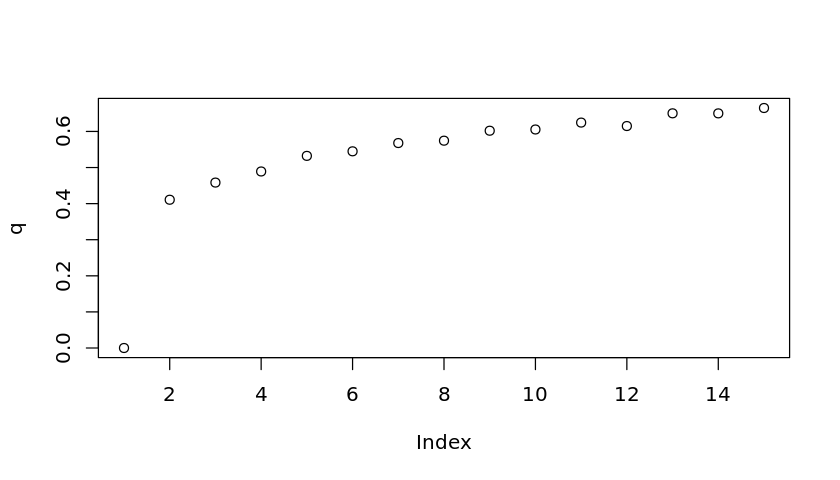

In [10]:
set.seed(1234)
#Número de clusters
q <- c()
for (k in 1:15) {
    myclust <- kmeans(genexp_norm[, 2:ncol(genexp_norm)], k)
    q[k] <- myclust$betweenss / myclust$totss
}

options(repr.plot.height = 4, repr.plot.width = 7)

plot(q)

options(repr.plot.height = 7, repr.plot.width = 7)

In [11]:
set.seed(1234)
myclust <- kmeans(genexp_norm[, 2:ncol(genexp)], 2)
table(genexp_norm$diagnosis, myclust$cluster)
myclust$betweenss/myclust$totss

        
          1  2
  Cancer 24 19
  Normal 20 23

[1] 0.4107856

In [12]:
set.seed(1234)
myclust <- kmeans(genexp_norm[, 2:ncol(genexp)], 3)
table(genexp_norm$diagnosis, myclust$cluster)
myclust$betweenss/myclust$totss

        
          1  2  3
  Cancer 24  4 15
  Normal 20 22  1

[1] 0.463234

In [13]:
set.seed(1234)
myclust <- kmeans(genexp_norm[, 2:ncol(genexp)], 4)
table(genexp_norm$diagnosis, myclust$cluster)
myclust$betweenss/myclust$totss

        
          1  2  3  4
  Cancer 23  1  7 12
  Normal 20 18  1  4

[1] 0.4935415

In [14]:
set.seed(1234)
myclust <- kmeans(genexp_norm[, 2:ncol(genexp)], 5)
table(genexp_norm$diagnosis, myclust$cluster)
myclust$betweenss/myclust$totss

        
          1  2  3  4  5
  Cancer  6  0 18 15  4
  Normal 12 10  8  0 13

[1] 0.5289504

El número de clusters óptimo es 5 y se puede observar como en dos clusters las muestras están perfectamente separadas.

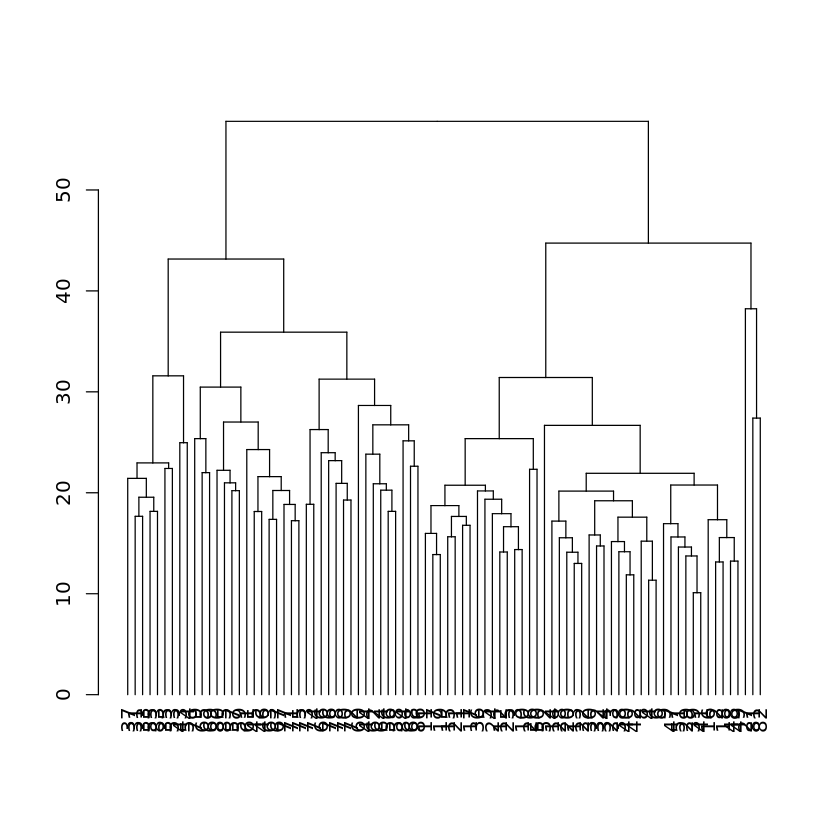

In [15]:
#Dendograma
d <- dist(as.matrix(genexp_norm[, 2:ncol(genexp_norm)]), method = "euclidean")
hc <- hclust(d, method = "complete")
hcd <- as.dendrogram(hc)
plot(hcd)

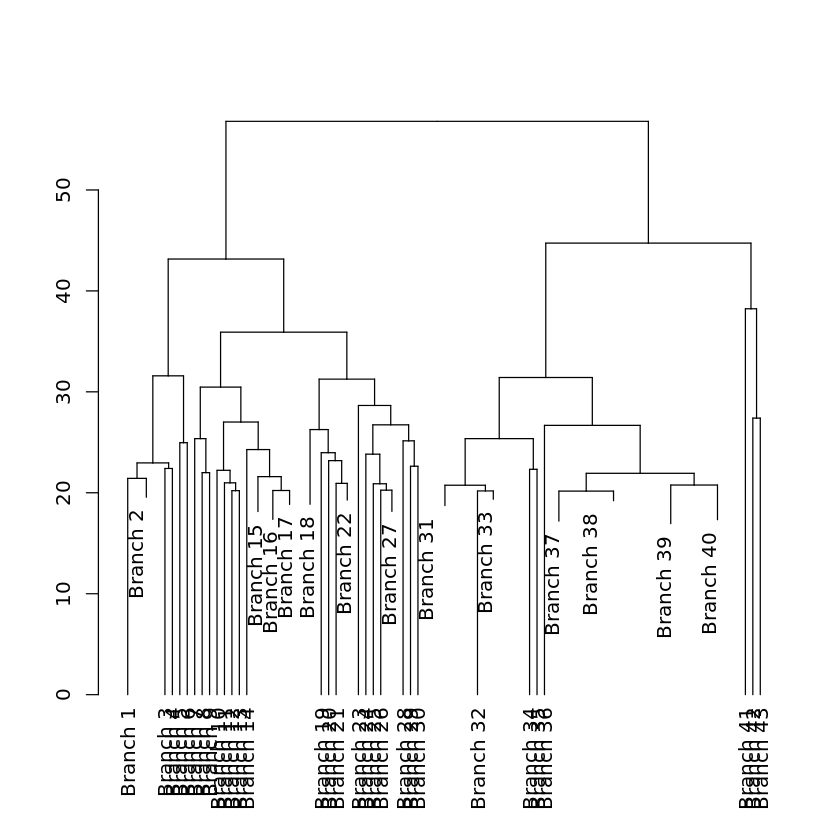

In [16]:
plot(cut(hcd, h = 20)$upper)

In [17]:
table(genexp_norm$diagnosis, cutree(hc, 4))

        
          1  2  3  4
  Cancer 24  1  1 17
  Normal 19  2  8 14

### Parte 3

Realizar un PCA, quedarse con los dos valores más representativos. Pintarlo en una nube de puntos donde los tejidos normales tendrán un color y los tejidos con cancer otro.

A partir de esta representación simplificada (con solo 2 valores más significativos) crear un modelo de regresión logística. Compara la curva ROC de este nuevo modelo con el de la *Parte 1*

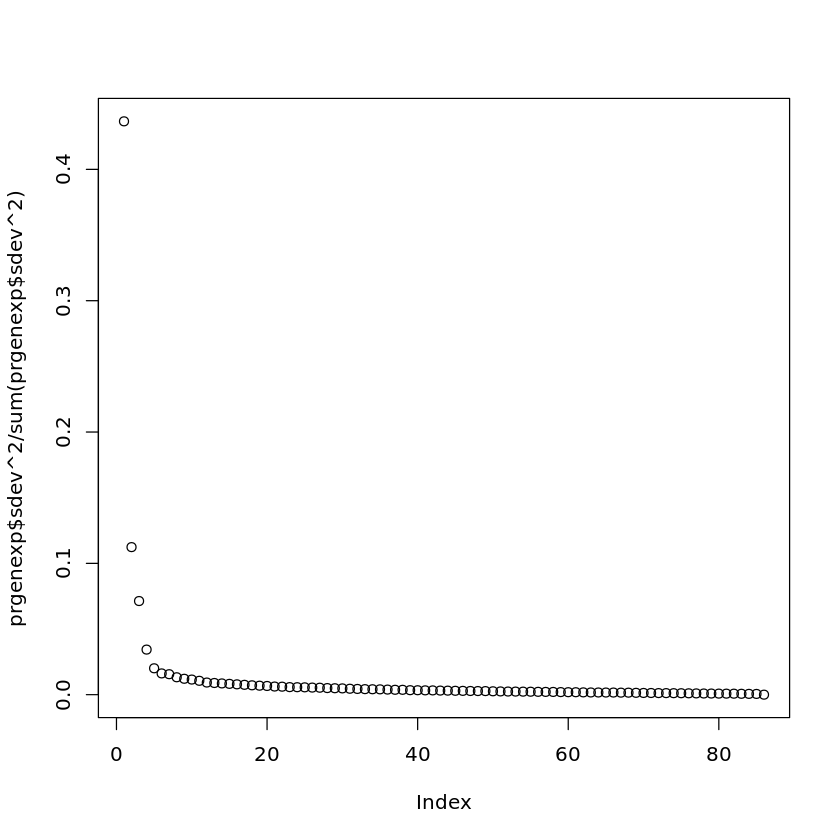

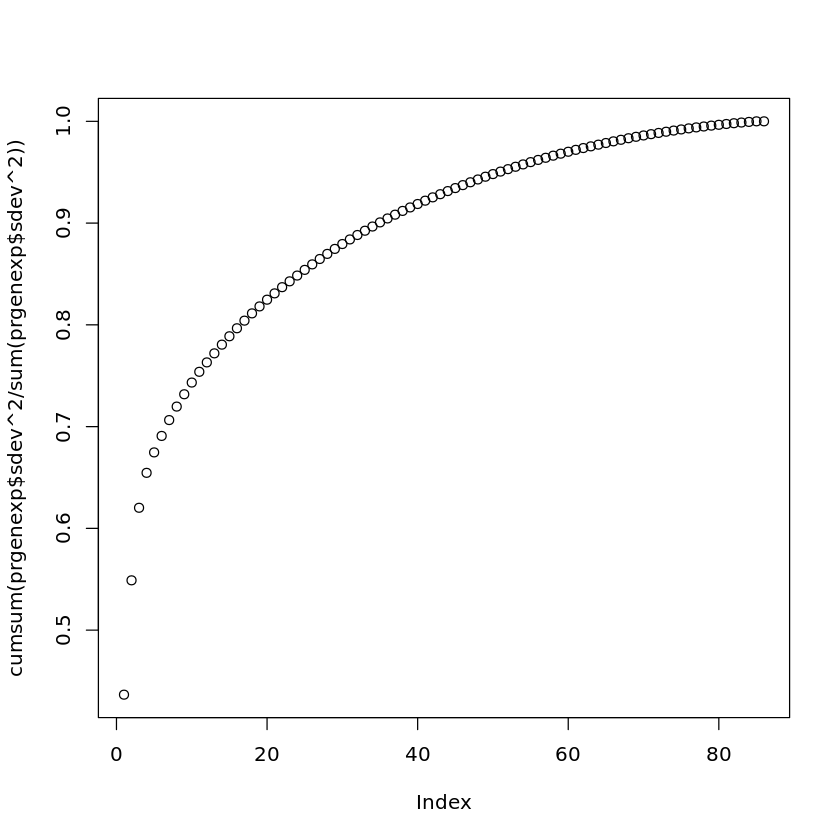

In [18]:
#Cálculo de PCA
prgenexp <- prcomp(genexp_norm[, 2:ncol(genexp_norm)], center = FALSE , scale. = FALSE)
plot(prgenexp$sdev ^ 2 / sum(prgenexp$sdev ^ 2))
plot(cumsum(prgenexp$sdev ^ 2 / sum(prgenexp$sdev ^ 2)))

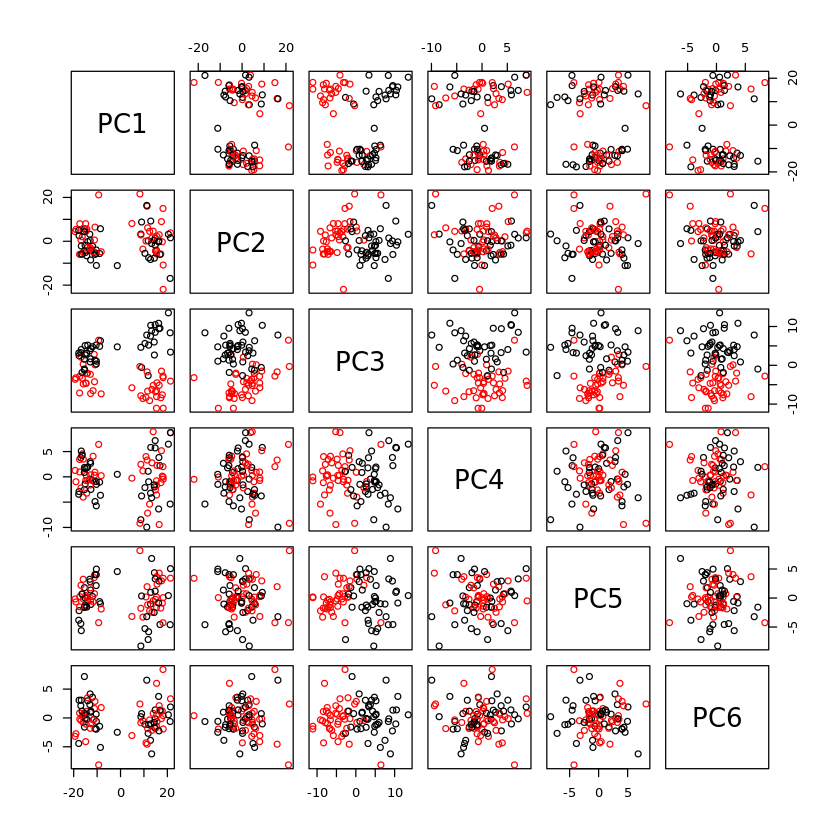

In [19]:
prgenexp_norm <- data.frame(genexp_norm$diagnosis, prgenexp$x[, 1:6])
plot(prgenexp_norm[, 2:7], col = prgenexp_norm[, 1])

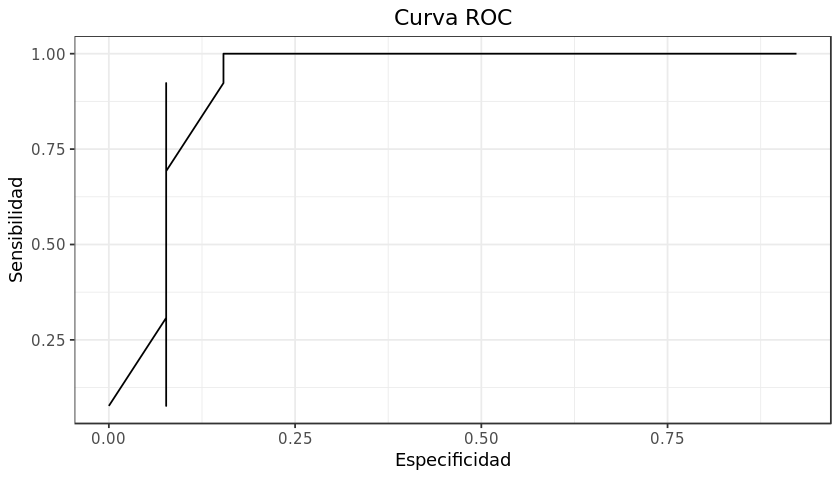

In [20]:
set.seed(1234)
#Conjuntos de training y test
idx <- sample(1:nrow(prgenexp_norm), round(nrow(prgenexp_norm) * 0.7))
prgenexp.train_norm <- prgenexp_norm[ idx,]
prgenexp.test_norm  <- prgenexp_norm[-idx,]

# Cálculo de la regresión logística
model_prgenexp <- glm(data = prgenexp.train_norm, formula = genexp_norm.diagnosis ~ ., family = binomial(link = 'logit'))
y_predict <- predict(model_prgenexp, prgenexp.test_norm)

#Cálculo de la curva ROC
dfROC2 <- data.frame(th = unique(y_predict), tp = NA, fp = NA)

for (i in 1:nrow(dfROC2)) {
    v <- calctp_fp(y_predict, prgenexp.test_norm$genexp_norm.diagnosis, dfROC2$th[i])
    dfROC2$tp[i] <- v["tp"]
    dfROC2$fp[i] <- v["fp"]
}

dfROC2 <- dfROC2[order(dfROC2$fp),]

options(repr.plot.height = 4, repr.plot.width = 7)

ggplot(data = na.omit(dfROC2), aes(x = fp, y = tp)) +
    geom_path() +
    labs(title = "Curva ROC", x = "Especificidad", y = "Sensibilidad") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.height = 7, repr.plot.width = 7)

In [21]:
y_est <- factor(ifelse(y_predict < 0, 0, 1), labels = c("Cancer", "Normal"))

#Medidas de calidad
M <- matrix(rep(0, 4), ncol = 2)

idx_normal <- prgenexp.test_norm$genexp_norm.diagnosis == "Normal"
idx_cancer <- prgenexp.test_norm$genexp_norm.diagnosis == "Cancer"

M[1, 1] = sum(y_est[idx_cancer] == "Cancer")
M[1, 2] = sum(y_est[idx_normal] == "Cancer")
M[2, 1] = sum(y_est[idx_cancer] == "Normal")
M[2, 2] = sum(y_est[idx_normal] == "Normal")

p <- M[1, 1] / (M[1, 2] + M[1, 1])
e <- M[1, 1] / (M[2, 1] + M[1, 1])
b <- 0.5
paste("Precisión:", p)
paste("F0.5:", (1 + b ^ 2) * (p * e) / (b ^ 2 * p + e))
paste("Exactitud:", (M[1, 1] + M[2, 2]) / sum(M))
paste("Exhausitivad:", e)

#Matriz de confusión
table(y_est, prgenexp.test_norm$genexp_norm.diagnosis)

[1] "Precisión: 0.9"

[1] "F0.5: 0.849056603773585"

[1] "Exactitud: 0.807692307692308"

[1] "Exhausitivad: 0.692307692307692"

        
y_est    Cancer Normal
  Cancer      9      1
  Normal      4     12

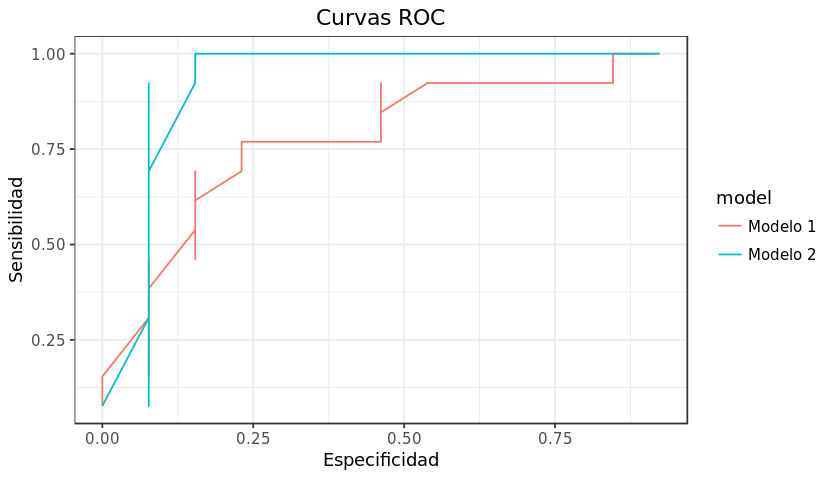

In [22]:
#Comparativa de los modelos a través de sus curvas ROC
dfROC_tot <- rbind(data.frame(dfROC1, model = "Modelo 1"), data.frame(dfROC2, model = "Modelo 2"))
dfROC_tot <- dfROC_tot[order(dfROC_tot$fp),]

options(repr.plot.height = 4, repr.plot.width = 7)

ggplot(data = na.omit(dfROC_tot), aes(x = fp, y = tp, color = model)) +
    geom_path() +
    labs(title = "Curvas ROC", x = "Especificidad", y = "Sensibilidad") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.height = 7, repr.plot.width = 7)